In [ ]:
dict(
    author="Rob Stenson",
    title="Geometry",
    date="11/29/2022"
)

In [1]:
#hide-publish
%pip install -q coldtype[notebook]
#!pip install -q "coldtype[notebook] @ git+https://github.com/goodhertz/coldtype"
from coldtype.notebook import *

## Dividing Rect(angles)

One of the core concepts of Coldtype is the use of the `coldtype.geometry.Rect` class to encapsulate rectangles and methods for slicing & dicing them.

The most basic rectangle is the one passed to a `renderable`, i.e. the `r` variable you get when you define a renderable function, like `def r1(r)` below. So to fill the entire canvas with a single random color, you can do something like this:


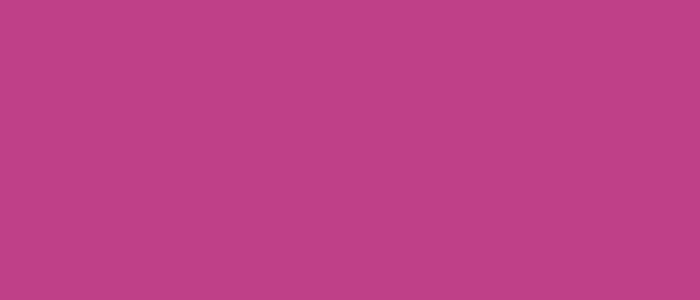

In [2]:
@renderable((700, 300))
def r1(r):
    return P(r).f(hsl(random()))

## Inset, offset, take, divide, subdivide...

All `@renderables` have a rectangle associated with them (the full rectangle of the artifact canvas), and all rendering functions are passed rectangles, either via the first and only argument, or as a property of the first argument, as is the case with @animation renderables, which pass a Frame argument that makes the rectangle accessible via f.a.r (where f is the Frame).

But we’re getting ahead of ourselves.

A Rect has lots of methods, though the most useful ones are `inset`, `offset`, `take`, `divide`, and `subdivide`.

Here’s a simple example that insets, offsets, subtracts, and then subtracts again. (Probably not something I’d write in reality, but good for demonstration purposes.)


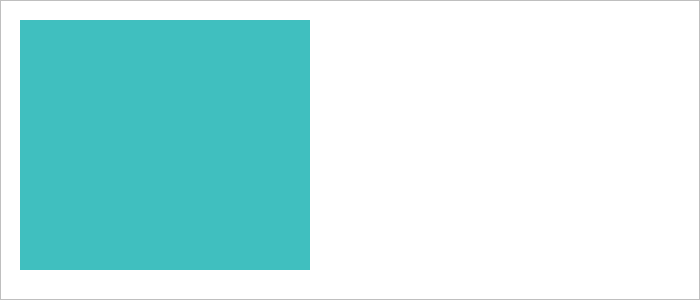

In [4]:
@renderable((700, 300))
def r2(r):
    r1 = (r.take(0.5, "W") # "W" for "West"
        .inset(20, 20)
        .offset(0, 10)
        .subtract(20, "E")
        .subtract(10, "N"))
    
    return (P().rect(r1)
        .f(hsl(0.5)))

## More complex slicing & dicing

You may have noticed that the rect functions take a mix of float and int arguments. That’s because a value less than `1.0` will be treated, by the dividing-series of rect functions, as percentages of the dimension implied by the edge argument. So in that `take(0.5, "W")` above, the `0.5` specifies 50% of the width of the rectangle (width because of the `W` edge argument).

Here’s an example that divides a rectangle into left and right rectangles, and shows another useful method, `square` (which takes the largest square possible from the center of the given rectangle).


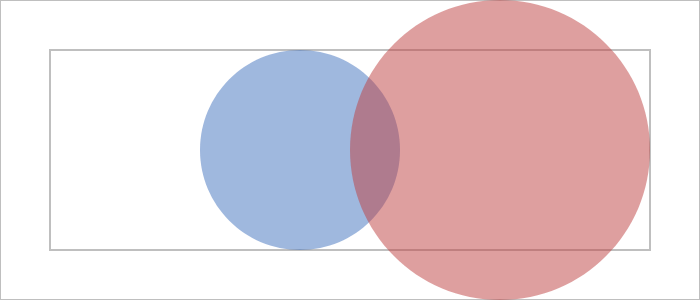

In [6]:
@renderable((700, 300))
def lr(r):
    ri = r.inset(50, 50)
    left, right = ri.divide(0.5, "W")
    return P(
        P().rect(ri).fssw(-1, 0.75, 2),
        P().oval(left
                .square()
                .offset(100, 0))
            .f(hsl(0.6, a=0.5)),
        P().oval(right
                .square()
                .inset(-50))
            .f(hsl(0, a=0.5)))

Here’s an example using subdivide to subdivide a larger rectangle into smaller pieces, essentially columns.


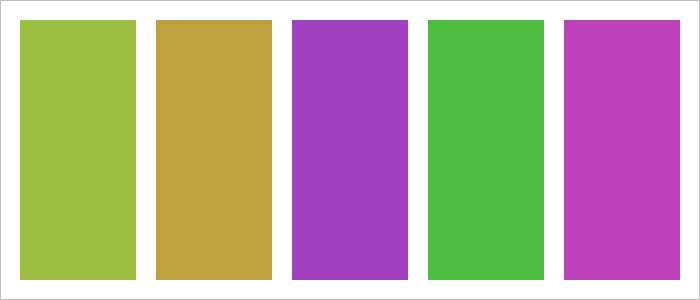

In [8]:
@renderable((700, 300))
def columns(r):
    cs = r.inset(10).subdivide(5, "W")
    return P.Enumerate(cs, lambda x:
        P(x.el.inset(10)).f(hsl(random())))

Of course, columns like that aren’t very typographic. Here’s an example using subdivide_with_leading, a useful method for quickly getting standard rows or columns with classic spacing.




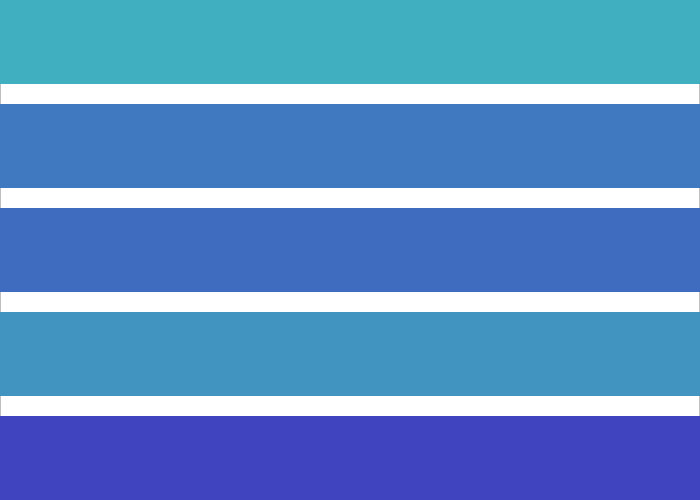

In [11]:
@renderable((700, 500))
def columns_leading(r):
    cs = r.subdivide_with_leading(5, 20, "N")
    return P.Enumerate(cs, lambda x:
        P(x.el).f(hsl(random())))

## Grids

If you’re a fan of CSS grids, you might like the weird little `Grid` class made available in Coldtype.


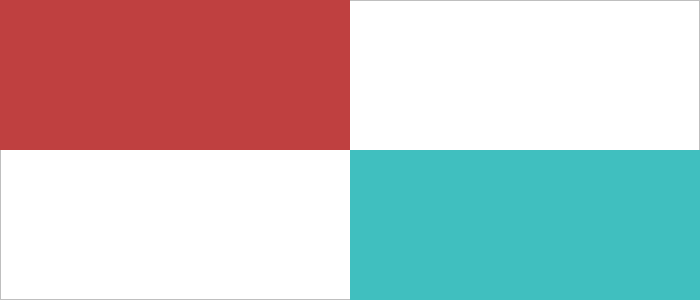

In [13]:
r = Rect(700, 300)
g = Grid(r, "a a", "a a", "a b / c d")

@renderable(r)
def simple_grid1(r):
    return P(
        P(g["a"]).f(hsl(0)),
        P(g["d"]).f(hsl(0.5)))


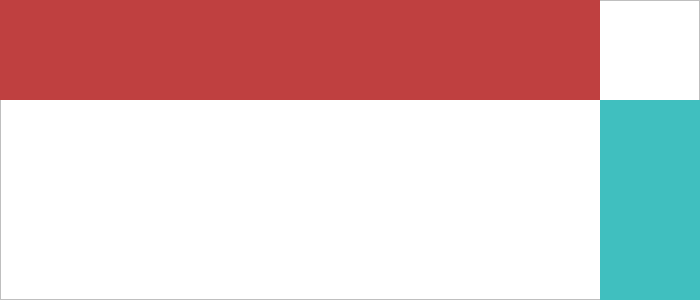

In [14]:
g = Grid(r, "a 100", "100 a", "a b / c d")

@renderable(r)
def simple_grid2(r):
    return (
        P(g["a"]).f(hsl(0)),
        P(g["d"]).f(hsl(0.5)))


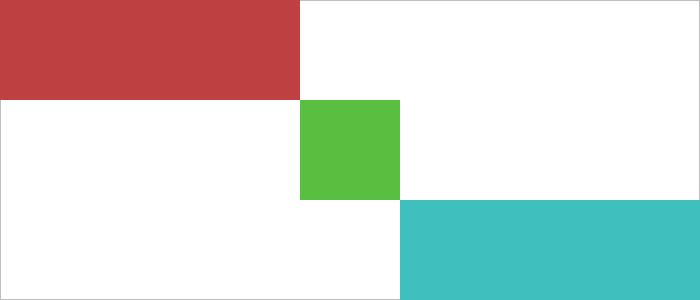

In [15]:
g = Grid(r, "a 100 a", "a 100 a", "a b c / d e f / g h i")

@renderable(r)
def simple_grid3(r):
    return (
        P(g["a"]).f(hsl(0)),
        P(g["e"]).f(hsl(0.3)),
        P(g["i"]).f(hsl(0.5)))